In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Считывание тренировочной и тестовой выборок

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
0,1122,1,0,33.6,5,9,0,0,0,0,...,1,8,0,6,1,12,5,2,12,2030000.0
1,1369,1,0,32.0,2,5,0,0,0,0,...,5,2,0,6,2,5,1,5,14,1400000.0
2,901,2,0,48.3,2,14,0,0,0,1,...,5,4,0,8,1,23,5,10,23,2950000.0
3,379,3,0,86.0,7,15,0,0,0,1,...,1,8,0,6,0,11,5,1,12,5250000.0
4,162,1,1,18.0,1,5,0,0,0,0,...,0,2,0,1,3,4,3,0,9,1080000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,318,2,0,45.0,1,5,0,0,0,0,...,3,5,0,7,2,11,2,8,9,2100000.0
798,1373,2,0,49.0,2,5,0,0,0,0,...,5,2,0,6,3,4,1,5,13,3000000.0
799,499,2,0,39.0,2,12,0,0,0,0,...,5,11,0,5,1,22,4,8,18,2450000.0
800,1375,1,1,21.0,3,5,1,0,0,0,...,5,1,0,2,3,5,0,4,9,1300000.0


In [4]:
del train['id']

<AxesSubplot:>

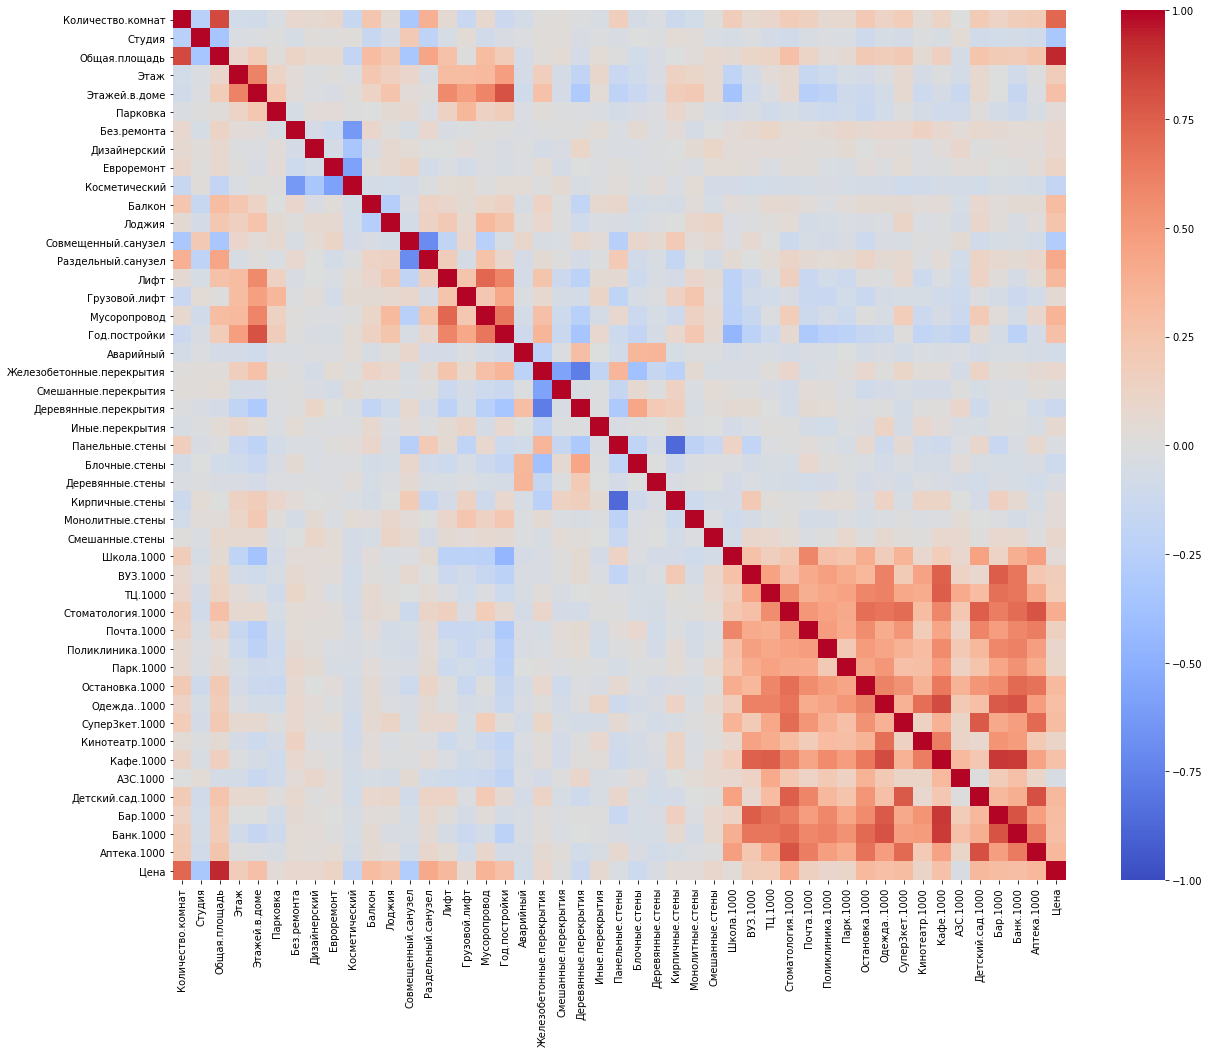

In [5]:
f, ax = plt.subplots(figsize =(20, 16))

sns.heatmap(train.corr(), ax = ax, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')

<AxesSubplot:>

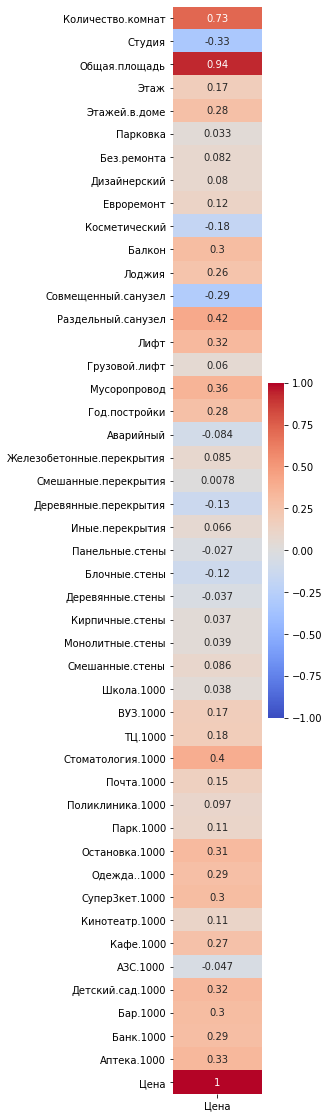

In [6]:
f, ax = plt.subplots(figsize =(2, 20))

sns.heatmap(train.corr()[['Цена']], ax = ax, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot = True)

# Предобработка данных

In [7]:
train

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
0,1,0,33.6,5,9,0,0,0,0,1,...,1,8,0,6,1,12,5,2,12,2030000.0
1,1,0,32.0,2,5,0,0,0,0,1,...,5,2,0,6,2,5,1,5,14,1400000.0
2,2,0,48.3,2,14,0,0,0,1,0,...,5,4,0,8,1,23,5,10,23,2950000.0
3,3,0,86.0,7,15,0,0,0,1,0,...,1,8,0,6,0,11,5,1,12,5250000.0
4,1,1,18.0,1,5,0,0,0,0,1,...,0,2,0,1,3,4,3,0,9,1080000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,2,0,45.0,1,5,0,0,0,0,1,...,3,5,0,7,2,11,2,8,9,2100000.0
798,2,0,49.0,2,5,0,0,0,0,1,...,5,2,0,6,3,4,1,5,13,3000000.0
799,2,0,39.0,2,12,0,0,0,0,1,...,5,11,0,5,1,22,4,8,18,2450000.0
800,1,1,21.0,3,5,1,0,0,0,1,...,5,1,0,2,3,5,0,4,9,1300000.0


In [8]:
def split_floors(floor):
    if floor == 1:
        return '1 этаж'
    elif 2 < floor < 10:
        return '2-10 этаж'
    else:
        return 'Высокий этаж'

In [9]:
def process(df):
    categorial_floors = df['Этаж'].apply(split_floors)
    df = df.join(pd.get_dummies(categorial_floors))
    del df['Этаж']
    return df

In [10]:
train = process(train)

In [11]:
def find_correlated(df):
    price_corr = df.corr()['Цена']
    return price_corr[abs(price_corr) > 0.05].index

In [12]:
# redunant_cols = find_correlated(train)
# train = train[redunant_cols]
# train

Также выделим колонку Цены в отдельный датафрейм

In [13]:
price_col = train.pop('Цена')

# Алгоритмы регрессии

Разделяем выборку на тренировочную и тестовую

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_val, y_train, y_val = train_test_split(train, price_col, train_size=0.7, random_state=42000)

### Функция оценки качества обучения модели

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
def assess(fitted_regression_model, train_data, val_data, train_real, val_real):
    train_pred = fitted_regression_model.predict(train_data)
    val_pred = fitted_regression_model.predict(val_data)
    
    print('MSE train: {:.4f}, test: {:.4f}'.format(
        mean_squared_error(train_real, train_pred),
        mean_squared_error(val_real, val_pred)))
    print('R^2 train: {:.4f}, test: {:.4f}'.format(
        r2_score(train_real, train_pred),
        r2_score(val_real, val_pred)))

### Линейная регрессия

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
assess(lr, X_train, X_val, y_train, y_val)

MSE train: 76601915771.9342, test: 93033794217.5306
R^2 train: 0.9354, test: 0.9188


### Лассо регрессия

In [20]:
from sklearn.linear_model import Lasso

In [21]:
lasso = Lasso(normalize=True)
lasso.fit(X_train, y_train)
assess(lasso, X_train, X_val, y_train, y_val)

MSE train: 76602024252.8584, test: 93011547719.9585
R^2 train: 0.9354, test: 0.9188


### Гребневая регрессия

In [22]:
from sklearn.linear_model import RidgeCV

In [23]:
ridge = RidgeCV(np.arange(0.1, 1000, 0.2))
ridge.fit(X_train, y_train)
assess(ridge, X_train, X_val, y_train, y_val)

MSE train: 79051601896.8443, test: 83934702168.5222
R^2 train: 0.9333, test: 0.9267


### Elastic-Net

In [24]:
from sklearn.linear_model import ElasticNet

In [25]:
en = ElasticNet()
en.fit(X_train, y_train)
assess(en, X_train, X_val, y_train, y_val)

MSE train: 87849802945.4107, test: 84248442371.5274
R^2 train: 0.9259, test: 0.9264


### Метод наименьших углов

In [26]:
from sklearn.linear_model import Lars

In [27]:
lars = Lars(fit_intercept=0.2220446049250313)
lars.fit(X_train, y_train)
assess(lars, X_train, X_val, y_train, y_val)

MSE train: 109913633652.4807, test: 123385590153.4718
R^2 train: 0.9073, test: 0.8923


c:\users\alekc\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 45 iterations, i.e. alpha=4.929e+00, with an active set of 44 regressors, and the smallest cholesky pivot element being 4.344e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
c:\users\alekc\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 45 iterations, i.e. alpha=3.498e+00, with an active set of 44 regressors, and the smallest cholesky pivot element being 5.771e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
c:\users\alekc\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regres

### Байесовская регрессия

In [28]:
from sklearn.linear_model import BayesianRidge

In [29]:
br = BayesianRidge()
br.fit(X_train, y_train)
assess(br, X_train, X_val, y_train, y_val)

MSE train: 81962422350.3500, test: 82962945026.9029
R^2 train: 0.9309, test: 0.9276


### Обобщенная линейная регрессия

In [30]:
from sklearn.linear_model import GammaRegressor

In [31]:
gr = GammaRegressor(max_iter=100)
gr.fit(X_train, y_train)
assess(gr, X_train, X_val, y_train, y_val)

MSE train: 259467678182.6939, test: 199633408809.0421
R^2 train: 0.7812, test: 0.8257


c:\users\alekc\appdata\local\programs\python\python39\lib\site-packages\sklearn\_loss\glm_distribution.py:246: RuntimeWarning: overflow encountered in power
  return np.power(y_pred, self.power)
c:\users\alekc\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_glm\glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


### Полиномиальная регрессия

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
pf = PolynomialFeatures(degree=3)
poly_X_train = pf.fit_transform(X_train)
poly_X_val = pf.fit_transform(X_val)

pr = LinearRegression()
pr.fit(poly_X_train, y_train)
assess(pr, poly_X_train, poly_X_val, y_train, y_val)

MSE train: 9269162.2103, test: 1187597514861.2737
R^2 train: 1.0000, test: -0.0370


### Деревья решений

In [36]:
from sklearn.ensemble import RandomForestRegressor 

In [37]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=80, min_samples_split=12, min_samples_leaf=6)
rfr.fit(X_train, y_train)
assess(rfr, X_train, X_val, y_train, y_val)

MSE train: 47767671626.4814, test: 88134050494.5157
R^2 train: 0.9597, test: 0.9230


In [44]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
dtr = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=6)
dtr.fit(X_train, y_train)
assess(dtr, X_train, X_val, y_train, y_val)

MSE train: 35090301559.6879, test: 120935899232.7106
R^2 train: 0.9704, test: 0.8944


# Отправка данных с ответами

In [38]:
id = test.pop('id')
# test = test[redunant_cols[0:-1]]
test = process(test)
price_prediction = ridge.predict(test)

In [39]:
def create_submission(id_col, y_pred):
    submission = pd.DataFrame({
        'id': id_col,
        'Цена': y_pred
    })
    return submission

In [40]:
sub = create_submission(id, price_prediction)

In [41]:
sub

,id,Цена
0,747,2.392792e+06
1,962,1.606740e+06
2,1105,2.233915e+06
3,795,4.350097e+06
4,390,2.823974e+06
...,...,...
778,1060,2.490937e+06
779,67,4.831654e+06
780,754,2.106875e+06
781,1077,2.758897e+06


In [42]:
sub.to_csv("sub4.csv", index=False)